# Project Name: Implementing a Simple Feedforward Neural Network for Binary Classification Using the Iris Dataset

**Overview:**
This educational project aims to introduce students to fundamental neural network concepts by implementing a basic feedforward neural network designed for binary classification. Students will gain practical experience by applying their model to the well-known Iris dataset.

**You have:**
- The Iris dataset, featuring attributes such as sepal length, sepal width, petal length, petal width, and binary labels (two selected classes).
- Basic proficiency in Python, NumPy, TensorFlow or PyTorch, and data visualization tools.

**We will:**
1. Preprocess and split the Iris dataset into training and testing subsets, selecting two classes for binary classification.
2. Implement a simple feedforward neural network architecture with fully connected layers, activation functions, and a suitable loss function.
3. Train and evaluate the neural network model, visualizing and interpreting results using metrics such as accuracy, precision, recall, and confusion matrix.

**Goal:**
Students will build a foundational understanding of neural networks, including data preparation, model construction, training, and evaluation, enabling them to confidently apply neural network techniques to real-world classification problems.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import base64
from IPython.display import display, HTML
import os
np.random.seed(42)

## Notebook utility

In [26]:
image_paths = ["img/ffn{}.png".format(i) for i in range(6,13)] + ["img/ffn{}.webp".format(i) for i in range(2,6)]
image_size = [700]*11
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open(path, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)

## Theoretical Background


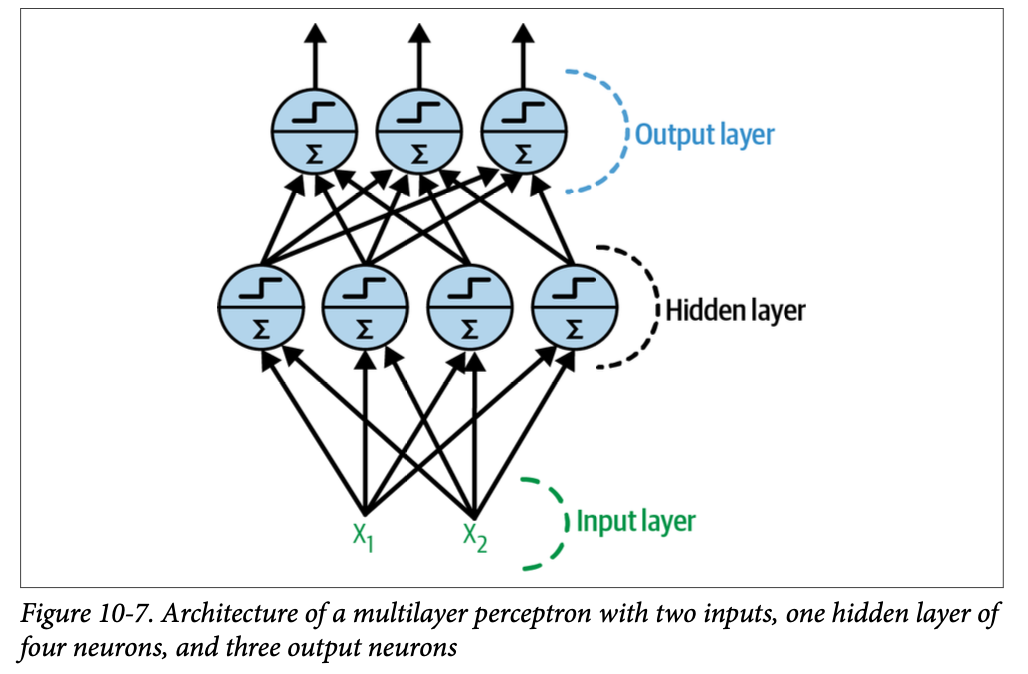

In [27]:
display(HTML(images_html[0]))


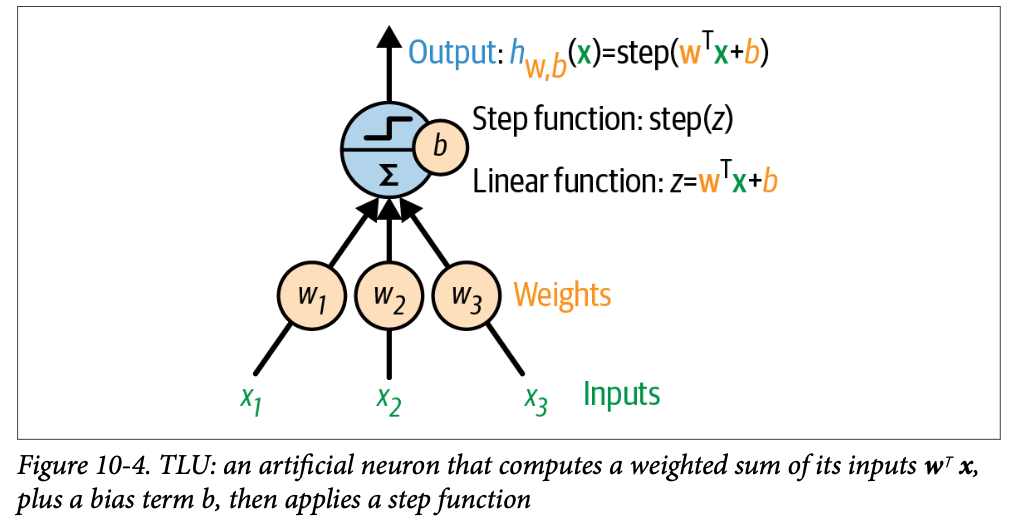

In [28]:
display(HTML(images_html[1]))


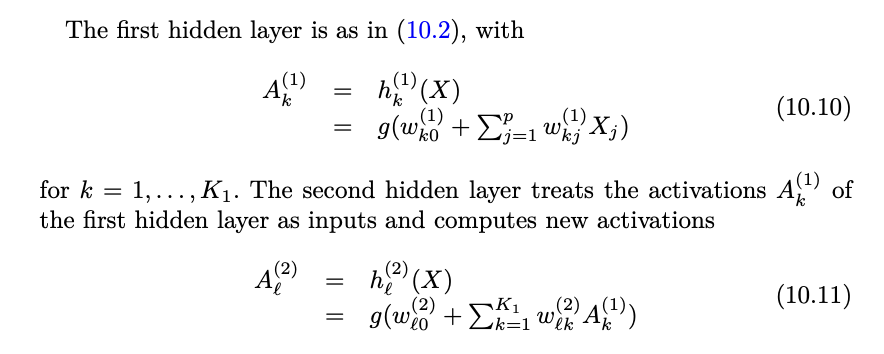

In [29]:
display(HTML(images_html[2]))


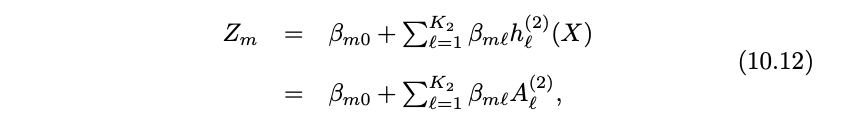

In [30]:
display(HTML(images_html[3]))


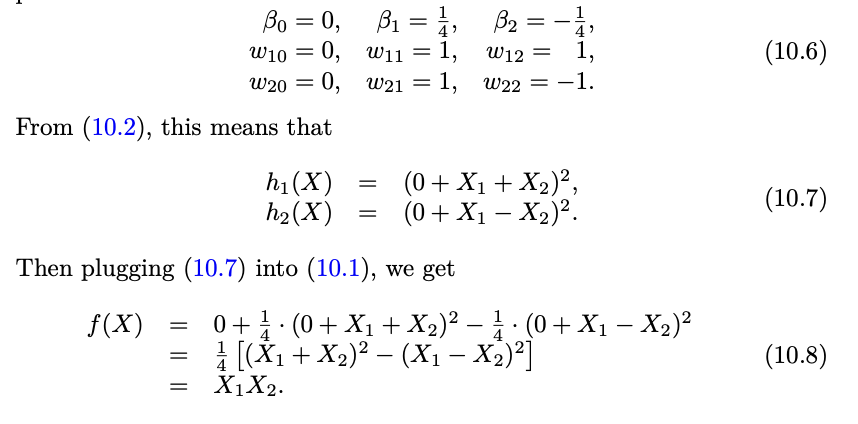

In [31]:
display(HTML(images_html[4]))


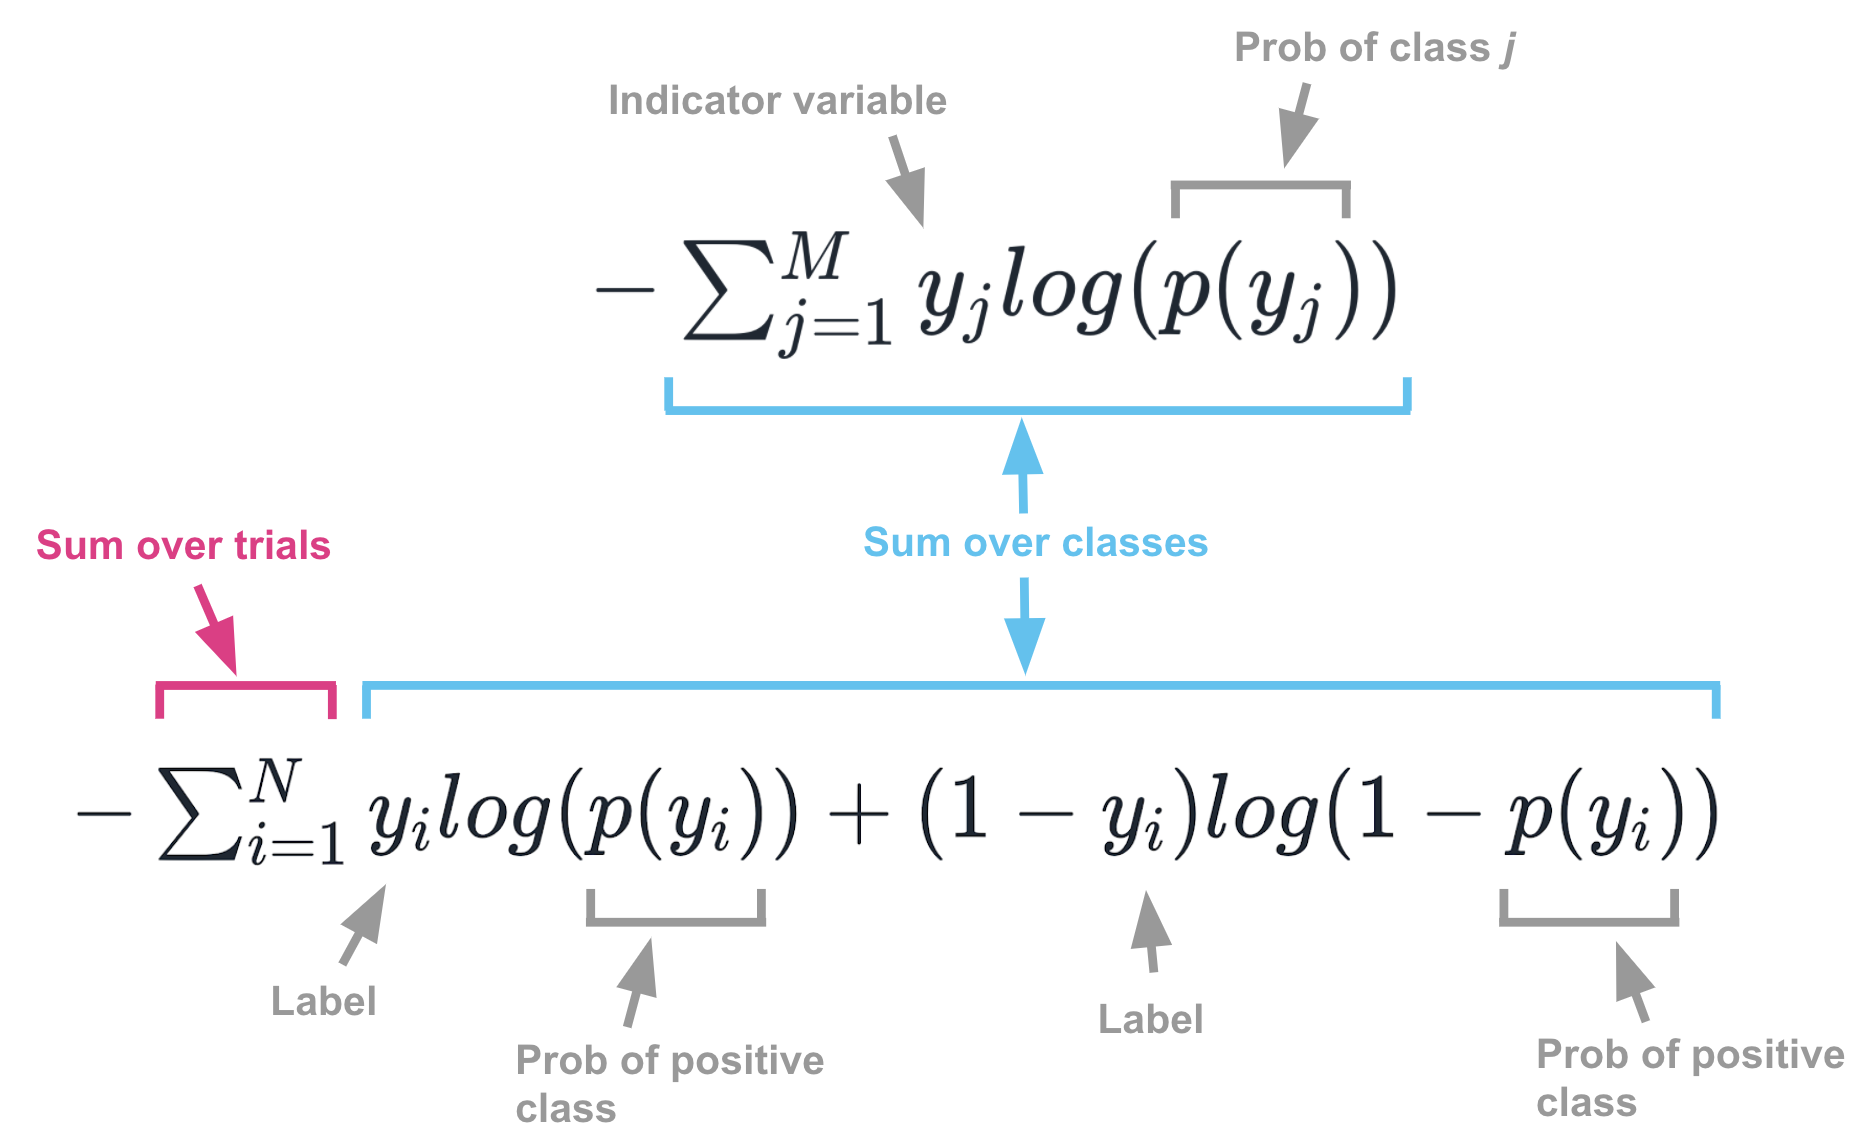

In [32]:
display(HTML(images_html[5]))


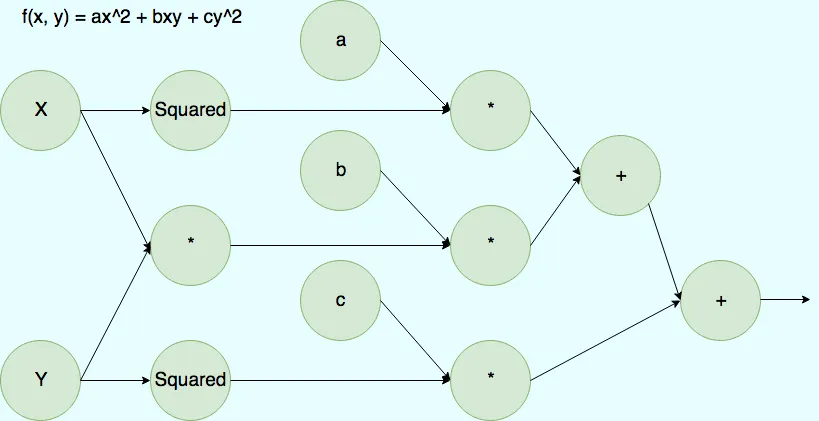

In [36]:
display(HTML(images_html[7]))


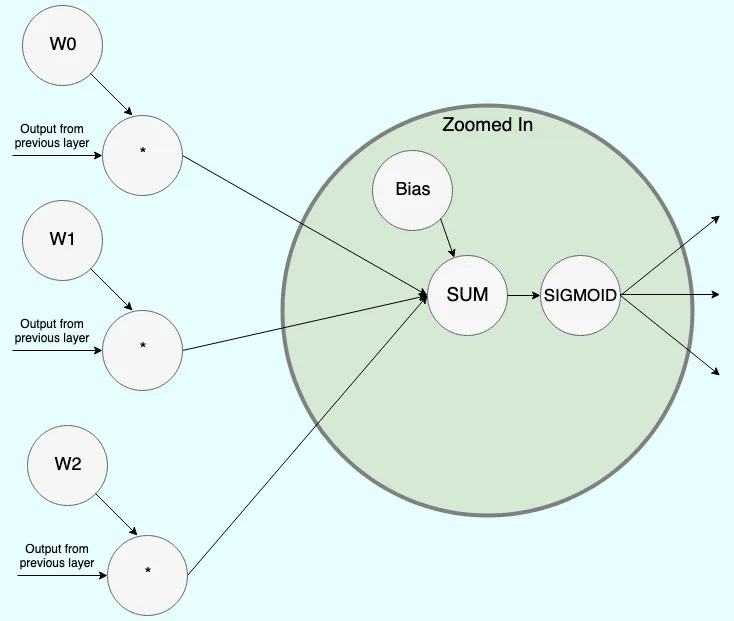

In [37]:
display(HTML(images_html[8]))


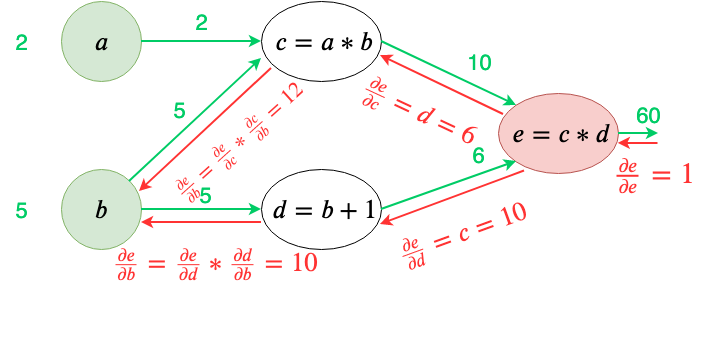

In [40]:
display(HTML(images_html[9]))


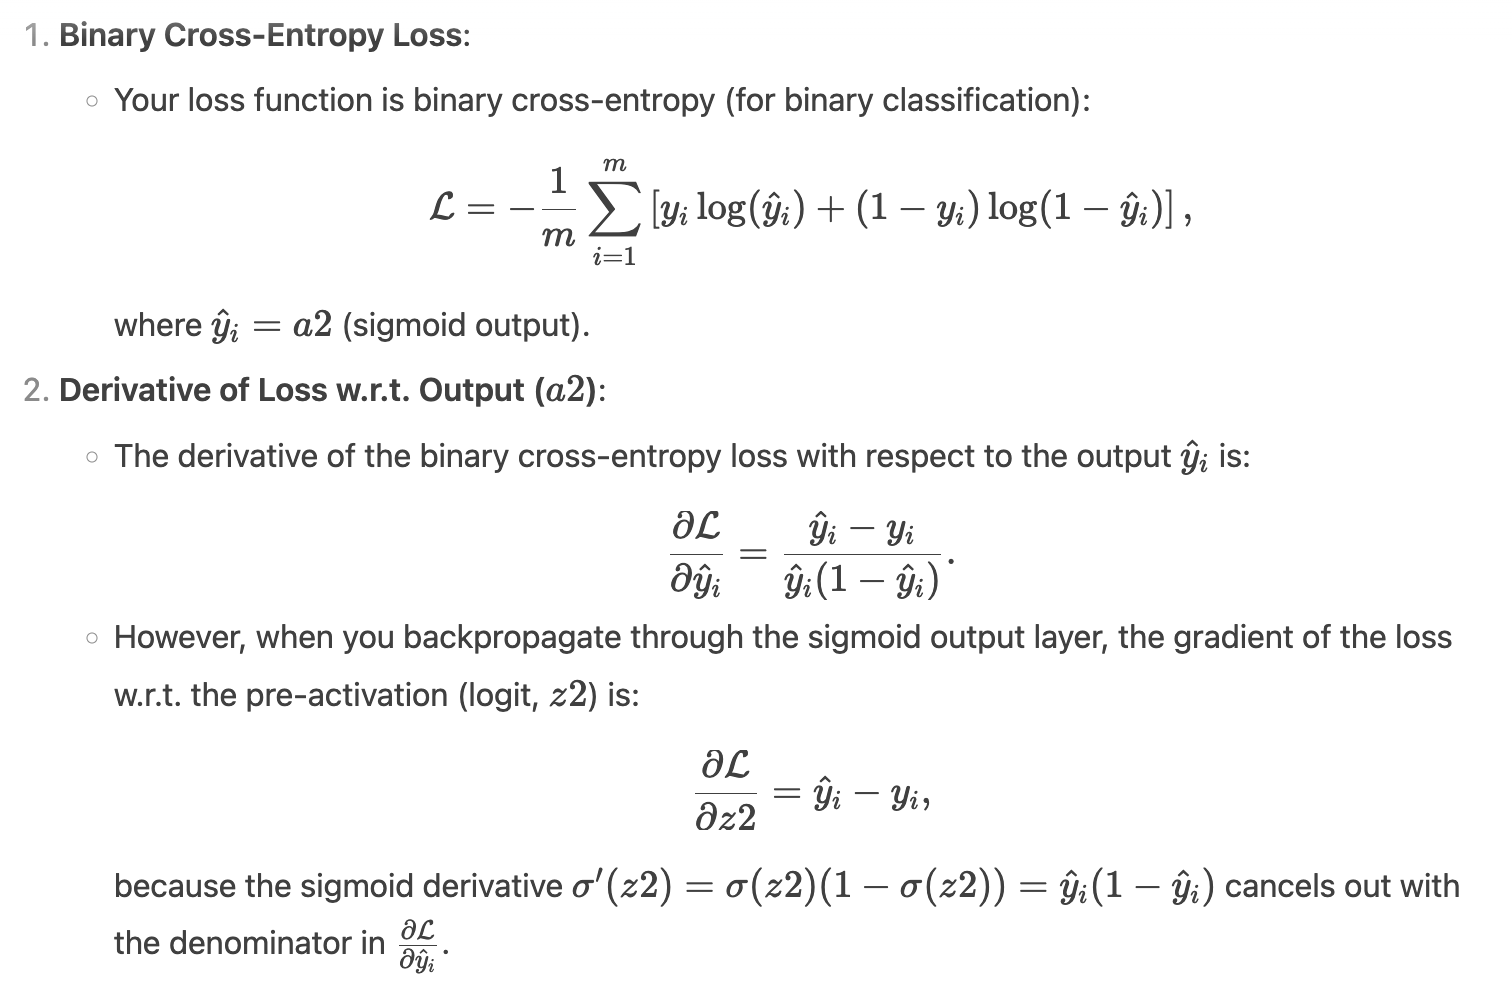

In [41]:
display(HTML(images_html[6]))


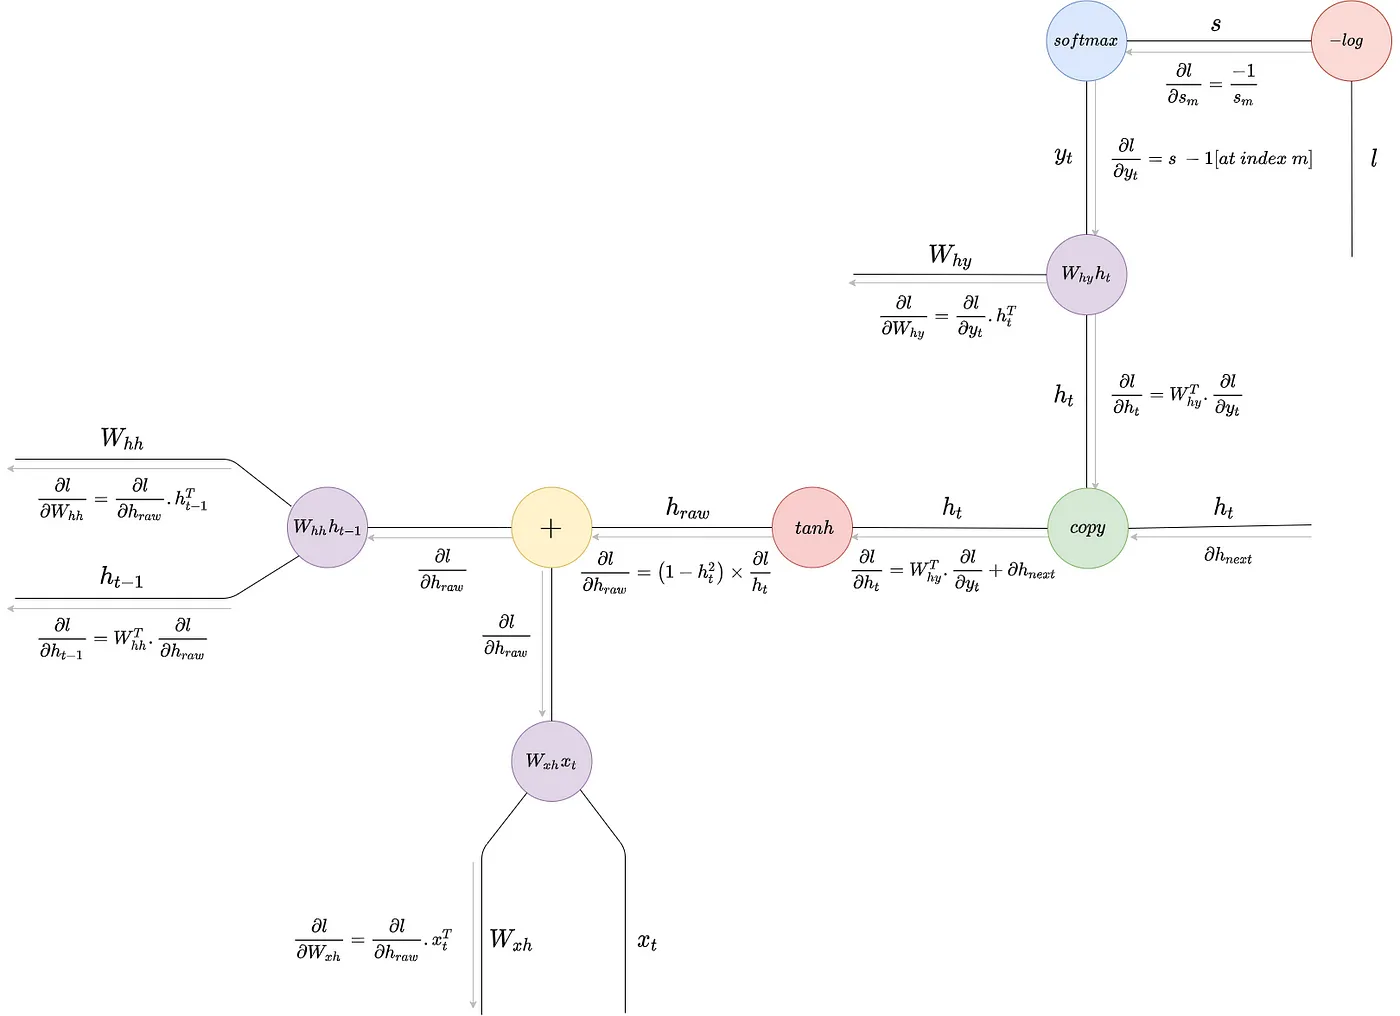

In [42]:
display(HTML(images_html[10]))

## Loading and exploring dataset

In [29]:
iris = load_iris()
X = iris.data
y = iris.target

print(f"Original dataset shape: {X.shape}")
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print("-"*50)
print("There are {} samples in the dataset".format(len(X)))
print("There are {} unique targets in the dataset".format(len(np.unique(y))))
print("Shape of each sample is {0}".format(X[0].shape))

Original dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
--------------------------------------------------
There are 150 samples in the dataset
There are 3 unique targets in the dataset
Shape of each sample is (4,)


In [21]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


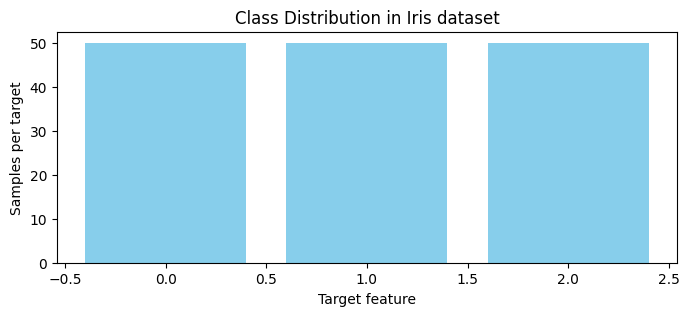

In [8]:
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(8, 3))
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Target feature')
plt.ylabel('Samples per target')
plt.title('Class Distribution in Iris dataset')
plt.show()

## Normalizing and preprocessing dataset

In [46]:
binary_mask = y != 2
X_binary = X[binary_mask]
y_binary = y[binary_mask]

print(f"\nBinary classification dataset shape: {X_binary.shape}")
print(f"Classes: 0 (setosa) vs 1 (versicolor)")
print(f"Class distribution: {np.bincount(y_binary)}")


Binary classification dataset shape: (100, 4)
Classes: 0 (setosa) vs 1 (versicolor)
Class distribution: [50 50]


In [47]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_binary)

print(f"\nFeature statistics after normalization:")
print(f"Mean: {np.mean(X_normalized, axis=0).round(3)}")
print(f"Std:  {np.std(X_normalized, axis=0).round(3)}")

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

print(f"\nData split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Feature statistics after normalization:
Mean: [-0. -0. -0.  0.]
Std:  [1. 1. 1. 1.]

Data split:
Training set: 80 samples
Test set: 20 samples


## Simple Feed Forward Network Architecture

In [42]:
class SimpleNeuralNetwork:
    """
    A simple feedforward neural network for binary classification.
    
    Architecture: Input Layer -> Hidden Layer -> Output Layer
    - Input layer: 4 neurons (4 features from Iris dataset)
    - Hidden layer: 6 neurons (arbitrary choice for this tutorial)
    - Output layer: 1 neuron (binary classification)
    """
    
    def __init__(self, input_size=4, hidden_size=6, output_size=3, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        self.W1 = np.random.normal(0, 0.5, (input_size, hidden_size))
        self.W2 = np.random.normal(0, 0.5, (hidden_size, output_size))
        
        self.b1 = np.zeros((1, hidden_size))   # Hidden layer bias
        self.b2 = np.zeros((1, output_size))   # Output layer bias
        
        self.loss_history = []
        self.accuracy_history = []
        
        print(f"Network architecture:")
        print(f"  Input layer:  {input_size} neurons")
        print(f"  Hidden layer: {hidden_size} neurons")
        print(f"  Output layer: {output_size} neuron")
        print(f"  Learning rate: {learning_rate}")
        print(f"  Total parameters: {self.count_parameters()}")

    def count_parameters(self):
        return self.W1.size + self.W2.size + self.b1.size + self.b2.size

    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, X):
        """
        1. Input → Hidden: z1 = X·W1 + b1, a1 = sigmoid(z1)
        2. Hidden → Output: z2 = a1·W2 + b2, a2 = sigmoid(z2)
        """
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2

    def compute_loss(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def backward_propagation(self, X, y_true):
        m = X.shape[0]
        
        output_error = self.a2 - y_true.reshape(-1, 1)
        
        dW2 = np.dot(self.a1.T, output_error) / m
        db2 = np.mean(output_error, axis=0, keepdims=True)
        
        hidden_error = np.dot(output_error, self.W2.T) * self.sigmoid_derivative(self.a1)
        
        dW1 = np.dot(X.T, hidden_error) / m
        db1 = np.mean(hidden_error, axis=0, keepdims=True)
        
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y, epochs=1000, verbose=True):
        print(f"\nStarting training for {epochs} epochs...")
        
        for epoch in range(epochs):
            # Forward propagation
            predictions = self.forward_propagation(X)
            
            # Compute loss
            loss = self.compute_loss(y, predictions)
            
            # Backward propagation (update weights)
            self.backward_propagation(X, y)
            
            # Calculate accuracy
            accuracy = self.calculate_accuracy(y, predictions)
            
            # Store history for visualization
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)
            
            # Print progress
            if verbose and (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1:4d}/{epochs} - Loss: {loss:.4f} - Accuracy: {accuracy:.4f}")

    def predict(self, X):
        probabilities = self.forward_propagation(X)
        return (probabilities > 0.5).astype(int)
    
    def predict_proba(self, X):
        return self.forward_propagation(X)
    
    def calculate_accuracy(self, y_true, y_pred):
        predictions = (y_pred > 0.5).astype(int)
        return np.mean(predictions.flatten() == y_true)

## Training the network

In [48]:
nn = SimpleNeuralNetwork(
    input_size=4,
    hidden_size=6,
    output_size=1,
    learning_rate=0.1
)

nn.train(X_train, y_train, epochs=1000, verbose=True)

Network architecture:
  Input layer:  4 neurons
  Hidden layer: 6 neurons
  Output layer: 1 neuron
  Learning rate: 0.1
  Total parameters: 37

Starting training for 1000 epochs...
Epoch  100/1000 - Loss: 0.8636 - Accuracy: 1.0000
Epoch  200/1000 - Loss: 1.1712 - Accuracy: 1.0000
Epoch  300/1000 - Loss: 1.4382 - Accuracy: 1.0000
Epoch  400/1000 - Loss: 1.6410 - Accuracy: 1.0000
Epoch  500/1000 - Loss: 1.7986 - Accuracy: 1.0000
Epoch  600/1000 - Loss: 1.9258 - Accuracy: 1.0000
Epoch  700/1000 - Loss: 2.0316 - Accuracy: 1.0000
Epoch  800/1000 - Loss: 2.1219 - Accuracy: 1.0000
Epoch  900/1000 - Loss: 2.2005 - Accuracy: 1.0000
Epoch 1000/1000 - Loss: 2.2698 - Accuracy: 1.0000


## Evaluation

In [49]:
train_predictions = nn.predict(X_train)
test_predictions = nn.predict(X_test)

train_probabilities = nn.predict_proba(X_train)
test_probabilities = nn.predict_proba(X_test)

train_accuracy = nn.calculate_accuracy(y_train, train_probabilities)
test_accuracy = nn.calculate_accuracy(y_test, test_probabilities)

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.1f}%)")
print(f"Test Accuracy:     {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")

print(f"\nExample predictions on test set:")
print("Actual | Predicted | Probability")
print("-" * 35)
for i in range(min(10, len(y_test))):
    actual = y_test[i]
    predicted = test_predictions[i][0]
    probability = test_probabilities[i][0]
    print(f"  {actual}    |     {predicted}     |   {probability:.3f}")

Training Accuracy: 1.0000 (100.0%)
Test Accuracy:     1.0000 (100.0%)

Example predictions on test set:
Actual | Predicted | Probability
-----------------------------------
  1    |     1     |   0.949
  1    |     1     |   0.995
  1    |     1     |   0.993
  1    |     1     |   0.992
  0    |     0     |   0.010
  0    |     0     |   0.010
  0    |     0     |   0.015
  1    |     1     |   0.993
  0    |     0     |   0.014
  0    |     0     |   0.007


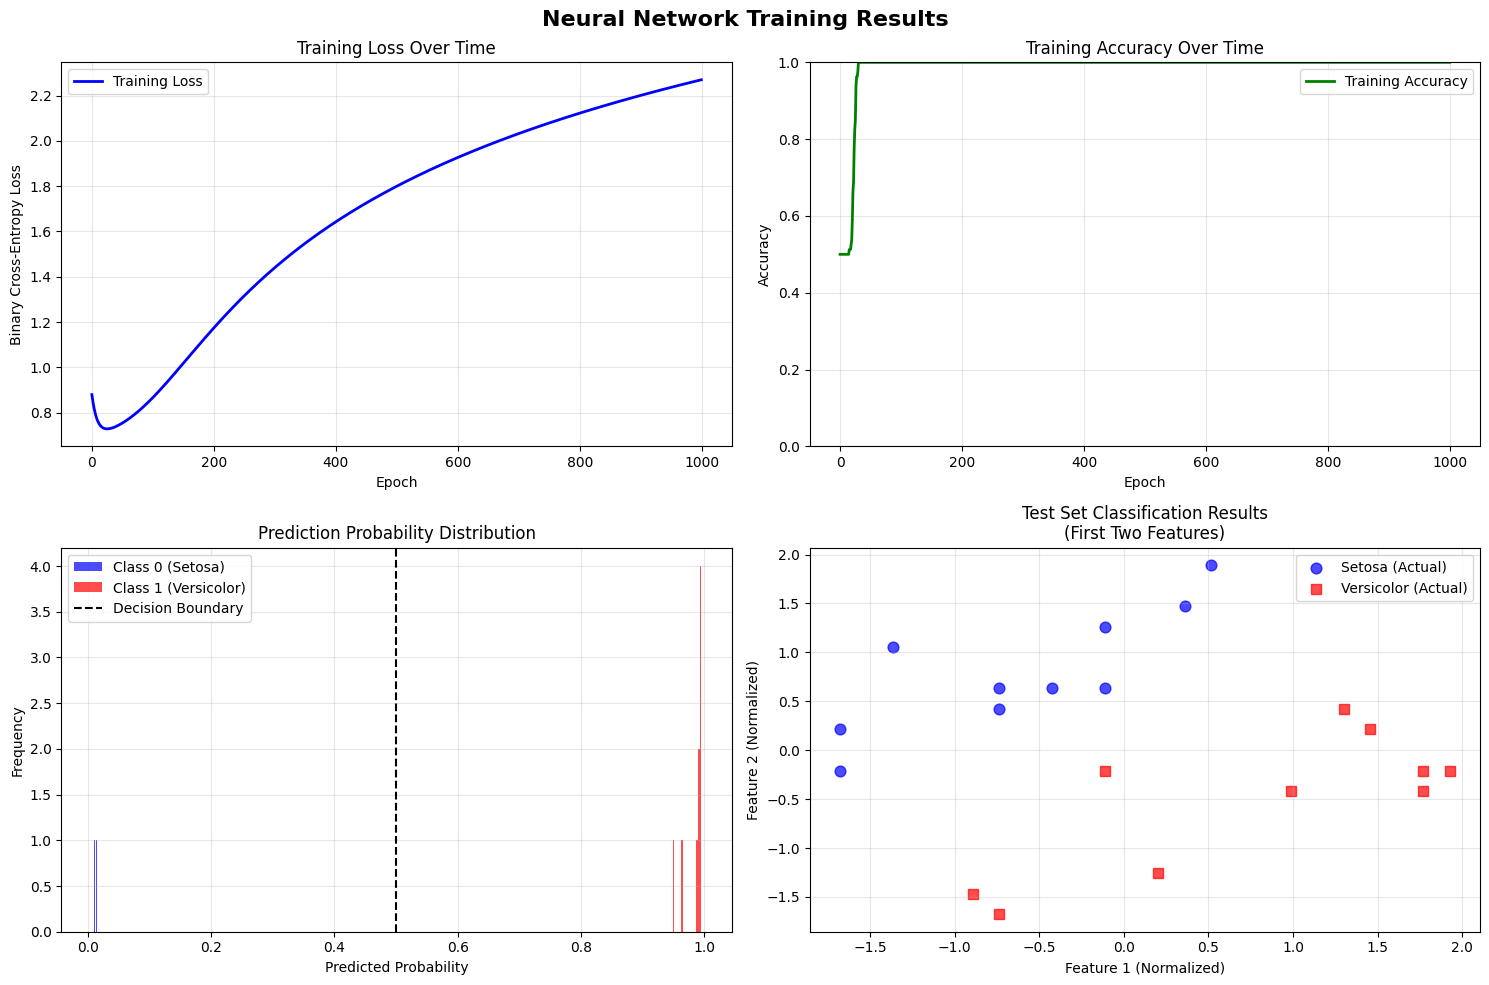

In [50]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Neural Network Training Results', fontsize=16, fontweight='bold')

# Plot 1: Training Loss over Epochs
ax1.plot(nn.loss_history, 'b-', linewidth=2, label='Training Loss')
ax1.set_title('Training Loss Over Time')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Binary Cross-Entropy Loss')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Training Accuracy over Epochs
ax2.plot(nn.accuracy_history, 'g-', linewidth=2, label='Training Accuracy')
ax2.set_title('Training Accuracy Over Time')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_ylim([0, 1])

# Plot 3: Prediction Probabilities Distribution
ax3.hist(test_probabilities[y_test == 0], bins=20, alpha=0.7, label='Class 0 (Setosa)', color='blue')
ax3.hist(test_probabilities[y_test == 1], bins=20, alpha=0.7, label='Class 1 (Versicolor)', color='red')
ax3.axvline(x=0.5, color='black', linestyle='--', label='Decision Boundary')
ax3.set_title('Prediction Probability Distribution')
ax3.set_xlabel('Predicted Probability')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Feature Space Visualization (using first two features)
# Separate classes for plotting
class_0_idx = y_test == 0
class_1_idx = y_test == 1

ax4.scatter(X_test[class_0_idx, 0], X_test[class_0_idx, 1], 
           c='blue', marker='o', label='Setosa (Actual)', s=60, alpha=0.7)
ax4.scatter(X_test[class_1_idx, 0], X_test[class_1_idx, 1], 
           c='red', marker='s', label='Versicolor (Actual)', s=60, alpha=0.7)

# Mark incorrect predictions
incorrect_idx = (test_predictions.flatten() != y_test)
if np.any(incorrect_idx):
    ax4.scatter(X_test[incorrect_idx, 0], X_test[incorrect_idx, 1], 
               c='yellow', marker='x', s=100, label='Misclassified', linewidths=3)

ax4.set_title('Test Set Classification Results\n(First Two Features)')
ax4.set_xlabel('Feature 1 (Normalized)')
ax4.set_ylabel('Feature 2 (Normalized)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## KEY CONCEPTS LEARNED:

1. NEURAL NETWORK ARCHITECTURE:
   - Input Layer: Receives features (4 neurons for 4 Iris features)
   - Hidden Layer: Learns complex patterns (6 neurons in our case)
   - Output Layer: Makes final prediction (1 neuron for binary classification)

2. FORWARD PROPAGATION:
   - Data flows from input → hidden → output
   - Each layer applies: Linear transformation + Activation function
   - Sigmoid activation: Maps any real number to range (0,1)

3. BACKPROPAGATION:
   - Calculates how much each weight contributed to the error
   - Uses chain rule to compute gradients efficiently
   - Updates weights to minimize error: W_new = W_old - α * gradient

4. TRAINING PROCESS:
   - Epoch: One complete pass through all training data
   - Loss function: Measures how wrong our predictions are
   - Learning rate: Controls how big steps we take during optimization

5. PERFORMANCE EVALUATION:
   - Accuracy: Percentage of correct predictions
   - Training vs Test accuracy helps detect overfitting
   - Probability distributions show model confidence

6. HYPERPARAMETERS TO EXPERIMENT WITH:
   - Hidden layer size: More neurons = more complexity
   - Learning rate: Higher = faster learning but less stable
   - Number of epochs: More = better fitting but risk overfitting
   - Network depth: Add more hidden layers for complex problems

7. NEXT STEPS FOR LEARNING:
   - Try different activation functions (ReLU, tanh)
   - Implement regularization (L1/L2, dropout)
   - Experiment with different optimizers (Adam, RMSprop)
   - Try multi-class classification (all 3 Iris species)